# Bisection (Aralık Yarılama/Bölme)

In [49]:
%reset -f

In [50]:
import numpy as np
import math

In [51]:
def f(x): return 4.5*x-2*np.sin(x)
a,b = 0,1
n = 2 # tekrar sayısı

In [52]:
sign = lambda x: math.copysign(1, x)

In [56]:
for i in range(n):
    fa=f(a)
    fb=f(b)
    if fa*fb<0:
        c=(a+b)/2
        fc=f(c)
        if sign(fa) != sign(fc): b=c
        else: a=c
        print('%2d.tekrar \ta=%.4f \tb=%.3f \tc=%.3f \tf(x)=%.3f' % (i+1,a,b,c,fc))
    elif (fa==0 or  fb==0): 
        if f(a)==0: print('%2d.tekrar \tkök: %.3f \tf(x)=%.3f' % (i+1,a,fa))
        else: print('%2d.tekrar \tkök: %.3f \tf(x)=%.3f' % (i+1,b,fb))
    else: print('%2d.tekrar  \tf(a)*f(b)>0 \tyani kök yok' % (i+1))

 1.tekrar 	kök: 0.000 	f(x)=0.000
 2.tekrar 	kök: 0.000 	f(x)=0.000


# Regula-Falsi

In [137]:
%reset -f

In [138]:
import numpy as np
import math

In [139]:
def f(x): return np.cos(x)+np.sin(x)+np.exp(x)-8
a,b = 1,4
n = 4 # tekrar sayısı

In [140]:
sign = lambda x: math.copysign(1, x)

In [141]:
for i in range(n):
    fa,fb=f(a),f(b)
    if sign(fa) != sign(fb):
        c= (a*fb-b*fa)/(fb-fa)
        if sign(fa) != sign(f(c)): b=c
        else: a=c
        print('%2d.tekrar \ta=%.3f \tb=%.3f \tc=%.3f' % (i+1,a,b,c))
    elif fa==fb: print('%2d.tekrar \tkök=%.4f=a=b' % (i+1,a))
    else: print('%2d.tekrar \tkök yok' % (i+1,a))

 1.tekrar 	a=1.238 	b=4.000 	c=1.238
 2.tekrar 	a=1.425 	b=4.000 	c=1.425
 3.tekrar 	a=1.571 	b=4.000 	c=1.571
 4.tekrar 	a=1.683 	b=4.000 	c=1.683


# Secant (Kiriş) Yöntemi

burada kökü araya alman gerekmiyor

#### Tek eşitlik

In [68]:
%reset -f

In [69]:
import numpy as np
import pandas as pd

In [70]:
def f(x): return -.5+x-np.sin(x)

In [71]:
n=5 # tekrar sayısı
out=[n]
out.clear()

In [72]:
x0,x1=0.5,2
for i in range(n):
    f0,f1=f(x0),f(x1)
    x2 = x1-f1*(x1-x0)/(f1-f0)
    out.append([i+1,x0,x1,x2,f(x2),x2-x1])
    x0,x1=x1,x2

In [73]:
pd.DataFrame(out, columns = ['adım','x0','x1','x2','f ( x2 )','Δx']).style.hide_index().set_precision(3)

adım,x0,x1,x2,f ( x2 ),Δx
1,0.500,2.000,1.172,-0.250,-0.828
2,2.000,1.172,1.418,-0.070,0.246
3,1.172,1.418,1.515,0.016,0.097
4,1.418,1.515,1.497,-0.001,-0.018
5,1.515,1.497,1.497,-0.000,0.001


# Newton-Raphson

In [260]:
%reset -f

In [261]:
import numpy as np
import sympy as sp
import pandas as pd

In [262]:
x=sp.symbols('x')
f=-x**2+sp.cos(x)

In [263]:
out=[]
out.clear()

In [265]:
n  = 6 # tekrar sayısı
x0 = 0.25
for i in range(n):
    fx0,dfx0=f.subs({x:x0}),sp.diff(f,x).subs({x:x0})
    x1=x0-fx0/dfx0
    op=np.array([x0,fx0,dfx0,x1]).astype(np.float)
    out.append([i+1,op[0],op[1],op[2],op[3]])
    x0=x1

In [266]:
pd.DataFrame(out, columns = ['adım','x0','f ( x0 )','f \' ( x0 )','x1']).style.hide_index().set_precision(3)

adım,x0,f ( x0 ),f ' ( x0 ),x1
1,0.250,0.906,-0.747,1.463
2,1.463,-2.032,-3.920,0.944
3,0.944,-0.306,-2.699,0.831
4,0.831,-0.017,-2.401,0.824
5,0.824,-0.000,-2.382,0.824
6,0.824,-0.000,-2.382,0.824


# Newton-Raphson
#### 2 Değişkenli Doğrusal Olmayan Denklem Sistemi Çözümü

In [128]:
%reset -f

In [129]:
import numpy as np
import sympy as sp
import pandas as pd

In [130]:
x,y=sp.symbols('x y')
Vf=sp.Matrix([[x**2 + -10*x + y**2 +8],
              [x*y**2 + x -10*y +8]])

V0=sp.Matrix([[0], # başlangıç değerleri !!! buradaki sympy kaldırılıp normal dizi yaparsan ileride hata veriyor
              [0]])

In [131]:
# jacobian
Js = sp.Matrix([[sp.diff(Vf[0],x), sp.diff(Vf[0],y)],
               [sp.diff(Vf[1],x), sp.diff(Vf[1],y)]])
Js

Matrix([
[2*x - 10,        2*y],
[y**2 + 1, 2*x*y - 10]])

In [134]:
out=[]
out.clear()
n=4 # tekrar sayısı

In [135]:
for i in range(n):
    J  = np.array(Js.subs({x:V0[0],y:V0[1]})).astype(np.float) # nümerik sonuç için sympy matrisini numpy dizisi olarak al
    F  = np.array(Vf.subs({x:V0[0],y:V0[1]})).astype(np.float) # nümerik sonuç için sympy matrisini numpy dizisi olarak al
    V0n= np.array(V0).astype(np.float) # nümerik sonuç için sympy matrisini numpy dizisi olarak al
    V1 = np.linalg.solve(J, -F) + V0n   
    V0 = sp.Matrix(V1)
    out.append([i+1,V0n[0,0],V0n[1,0],V1[0,0],V1[1,0]])    

In [136]:
pd.DataFrame(out, columns = ['adım','x0','y0','x1','y1']).style.hide_index().set_precision(3)

adım,x0,y0,x1,y1
1,0.800,0.880,0.992,0.992
2,0.992,0.992,1.000,1.000
3,1.000,1.000,1.000,1.000
4,1.000,1.000,1.000,1.000


# Sabit Noktalı İterasyon

In [1]:
%reset -f

In [2]:
import pandas as pd
import sympy as sp

Türev kontrolünün (df<1) ardından seçilen fonksiyonlarla:

In [10]:
'''
Verilen f(x) ifadesini x=g(x) şekline dönüştür !!!dönüştürürken dikkat et!!! Sonra buradaki g(x)'i kullan':
f(x)=x**3-x-3 ise, x=x**3-3
''';

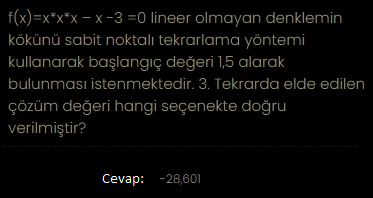

In [4]:
# Örnek:
from IPython.display import Image
from IPython.core.display import HTML 
Image("sabit iterasyon.png")

In [5]:
x=sp.symbols('x')

f= x**3-x-3
f

x**3 - x - 3

In [6]:
g= f+x
g

x**3 - 3

In [7]:
''''''
# başlangıç değeri
x0=1.5
# tekrar sayısı 
n=3
'''''';

In [8]:
out=[]
out.clear()
for i in range(n):
    t=sp.N(x0)
    x0=g.subs({x:t})
    out.append([i+1,t.round(3),x0.round(3),f.subs({x:t}).round(3),f.subs({x:x0}).round(3)])

In [9]:
pd.DataFrame(out,columns = ['adım','x0','x1','f(x0)','f(x1)']).style.hide_index().set_precision(2)

adım,x0,x1,f(x0),f(x1)
1,1.500,0.375,-1.125,-3.322
2,0.375,-2.947,-3.322,-25.654
3,-2.947,-28.601,-25.654,-23370.640
